**linear regression**

In this notebook the linear regression is demonstrated in 5 examples:<br>
(note: internal links are only valid of the linked cell is already run)<br>
[example_1](#example_1): some datpoints with low noise<br>
[example_2](#example_2): more datapoints and stronger distotion<br>
[example_3](#example_3): Linear Regression with outliers<br>
[example_4](#example_4): regularized regression with ridge regression and lasso<br>
[example_5](#example_5): Regularized Regression with polynomial dataset<br>


<a id='calc_regression'></a>
### def calc_regression():
**function to define a linear model and fit the given data to the model**<br>
[sckit-learn.LinearModels](https://scikit-learn.org/stable/modules/linear_model.html#ordinary-least-squares)<br>

LinearRegression fits a linear model with coefficients $ \omega = \left\{\omega_1, ...,\omega_p\right\}$
to minimize the residual sum of squares between the observed targets in the dataset, and the targets predicted by the linear approximation. Mathematically it solves a problem of the form:
$$\min\limits_{\omega}||X\omega - y||_2^2 $$
LinearRegression will take in its fit method arrays $X, y$ and will store the coefficients $\omega$ of the linear model in its ````coef_```` member. The coefficient estimates for Ordinary Least Squares rely on the independence of the features.
When features are correlated and the columns of the design matrix $X$ have an approximate linear dependence, the design 
matrix becomes close to singular and as a result, the least-squares estimate becomes highly sensitive to random errors
in the observed target, producing a large variance. This situation of multicollinearity can arise, for example, 
when data are collected without an experimental design.
<br>
[class LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression):<br>
methods (most important):
- fit(X, y[, sample_weight])     : fit linear model either with all data or with a part of the data
- predict(X) : Predict using the linear model.
- score(X, y[, smaple_weigth])   : Return the coefficient of determination R^2 of the prediction.
    
attributes<br>
- ```coef_``` : array of shape (n_features, ) or (n_targets, n_features)<br> Estimated coefficients for the linear regression problem. If multiple targets are passed during the fit (y 2D), this is a 2D array of shape (n_targets, n_features),while if only one target is passed, this is a 1D array of length n_features.
- ``intercept_``: float or array of shape (n_targets,)<br> Independent term in the linear model. Set to 0.0 if $\text{fit_intercept = False}$.

in $\text{calc_regression()}$ the linear model will be created and fit to the given datapoints. It is possible to do the fitting with all datapoints or with a part of them (training).<br> The fitted model will be used to predict values along the x-Axis of the given datapoints. The accuricy of the linear model is represented due to score() and the two attributes $\text{coef_}$ and $\text{intercept_}$.
calc_regression returns a dictionary containig the linear model and its datapoints as well as all information about the linear regression.


In [6]:
def calc_regression(dataPoints, training=False, testSize=None):
    #
    # create linear regression model
    regModel = linear_model.LinearRegression()
    #
    # split datapoints matrix in x and y values
    #
    # --> np.array.reshape(-1,1): -1: unknown size of row
    #                              1: 1 column
    #                    result:  a vertical vector of dataPoints with nRows(=len(dataPoints)) and 1 column 
    #
    X = dataPoints[:,0].reshape(-1,1)
    Y = dataPoints[:,1].reshape(-1,1)
    #
    # calc residual sum of squares
    # there are in general 2 ways of using the linear regression model
    # - calc residual sum of squares with all given datapoints
    # - devide the given datapoints into training and test data. 
    if training:
        # split data into training and test data
        #
        # here x% of the dataPoints are used to train the algortihm
        # --> parameter: 'test_size'
        #
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=testSize, random_state=0)
        #
        # create LinearRegression model and train it with training data
        #
        regModel = linear_model.LinearRegression()
        regModel.fit(X_train, Y_train)
    else:
        regModel.fit(X,Y)
        #
        #
    # test regModel when predicting along the x-axis:
    predictValues = regModel.predict(X)
    #
    dictLinRegression = {
        'model': regModel,
        'X': X,
        'Y': Y,
        'yPredict': predictValues,
        'coef': regModel.coef_,
        'intercept': regModel.intercept_,
        'score': regModel.score(X,Y)}
    
    return(dictLinRegression)

<a id='get_DataPoints'></a>
### def get_DataPoints():
**function to define a 2 dimensional array with points on a linear function**<br>

input parameters:
- nPoints
- slope
- intercept
- xmax
- xmin (default:0)

$\text{get_DataPoints()}$ returns a 2dimensional numpy-array with points of the linear function: y = slope * x + intercept.
- column_0: linear spaced x-values from xmin...xmax  
- column_1: y-values according to the linear function with the parameter slope and intercept
(column size depends on nPoints)


In [7]:
def get_DataPoints(nPoints, slope, intercept,xmax, xmin=0):
    #
    dataPoints = np.empty([nPoints,2])
    dataPoints[:,0] = np.linspace(xmin, xMax, nPoints)
    dataPoints[:,1] = dataPoints[:,0]*slope + intercept
    #
    return(dataPoints)

<a id='create_noiseVec'></a>
### def create_noiseVec():
**function to define a vector containig noise**<br>

input parameter:
- distortion
- n_length
- noise_type (default: 'gaussian')
- n_columns  (default: 2)

random generator:
numpy.random


In [8]:
def create_noiseVec(distortion, n_length, noise_type='gaussian', n_columns=2):
    #
    # create a vector of given size with noise
    #
    if noise_type == 'gaussian':
        mu = 0 # parameter mu has no effect on the distortion
        noise_vec = np.random.normal(mu, distortion, [n_length, n_columns]) 
    #
    return(noise_vec)

<a id='example_1'></a><br>**Example 1**

simple dataset with a few points and not much noise.

Create dataset using function [get_DataPoints()](#get_DataPoints) und [create_noiseVec()](#create_noiseVec). The predefined parameters allow following linear function:<br>
- $y = 0.45 \bullet x + 0.5$
- total number of points:    20
- x-range: 0...10
<br>
- distortion: 0.4

After regression is computed with [calc_regression](#calc_regression) the predicted values are plotted together with the noisy datapoints and the 'true' linear function.

more info about linear regression: [sckit-learn.LinearModels](https://scikit-learn.org/stable/modules/linear_model.html#ordinary-least-squares)<br>

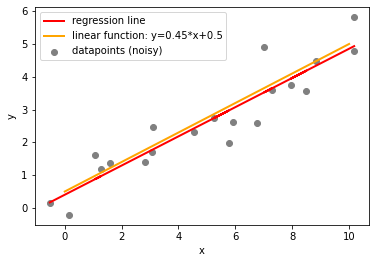

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split 
#
# generate a simple dataset
#
# create 20 datapoints
#
xMin = 0
xMax = 10
#
nPoints = 20 
#
slope = 0.45 
#
intercept = 0.5
#
clearLinData = get_DataPoints(nPoints, slope, intercept, xMax, xMin)
#
# create some noise
#
noiseData = create_noiseVec(0.4, nPoints)
#
# add noise to the linear points
noisyPoints = clearLinData + noiseData
#
# calculate linear regression
#
dictReg = calc_regression(noisyPoints)
#
#---------------------------------------------------------------------
#
# plot data
#
# 
xPoints = dictReg["X"]
yPoints = dictReg["Y"]
#
yPredict = dictReg["yPredict"]
#
# all points (with little noise)
plt.scatter(xPoints, yPoints, color='gray', label="datapoints (noisy)")
# regression line from regression model
plt.plot(xPoints, yPredict, color='red', linewidth=2, label="regression line")
# linear function of clean data (y = m*x + b)
plt.plot(clearLinData[:,0], clearLinData[:,1], color='orange', lw=2, label="linear function: y={}*x+{}".format(slope, intercept))
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

<a id='example_2'></a><br>**Example 2**

more datapoints and stronger distotion:

Create dataset using function [get_DataPoints()](#get_DataPoints) und [create_noiseVec()](#create_noiseVec). The predefined parameters allow following linear function:<br>
- y = 0.45 * x + 0.5 <br>
- total number of points: 200 <br>
- x-range: 0...10 <br>
- distortion: 4.0

After regression is computed with [calc_regression](#calc_regression) the predicted values are plotted together with the noisy datapoints and the 'true' linear function.<br>
more info about linear regression: [sckit-learn.LinearModels](https://scikit-learn.org/stable/modules/linear_model.html#ordinary-least-squares)<br>

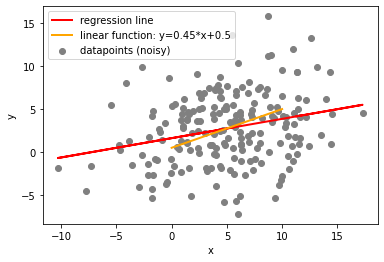

In [10]:
#
# generate a simple dataset with strong distortion
#
#
xMin = 0
xMax = 10
#
nPoints = 200 # total number of points 
#
slope = 0.45 #(m)
#
intercept = 0.5 #(b)
#
clearLinData = get_DataPoints(nPoints, slope, intercept, xMax, xMin)
#
# create some noise
#
noiseData = create_noiseVec(4.0, nPoints)
#
# add noise to the linear points
noisyPoints = clearLinData + noiseData
#
# calc linear regression
#
dictReg = calc_regression(noisyPoints)
#
# test regression model

# plot data
#
# 
xPoints = dictReg["X"]
yPoints = dictReg["Y"]
#
yPredict = dictReg["yPredict"]
#
# all points (with little noise)
plt.scatter(xPoints, yPoints, color='gray', label="datapoints (noisy)")
# regression line from regression model
plt.plot(xPoints, yPredict, color='red', linewidth=2, label="regression line")
# linear function of clean data (y = m*x + b)
plt.plot(clearLinData[:,0], clearLinData[:,1], color='orange', lw=2, label="linear function: y={}*x+{}".format(slope, intercept))
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

<a id='example_3'></a><br>**Example 3**

#### Linear Regression with outliers


Create dataset using function [get_DataPoints()](#get_DataPoints) und [create_noiseVec()](#create_noiseVec). The predefined parameters allow following linear function:<br>
- y = $0.45\cdot x + 0.5 $
- nPoints:  100 (total number of points)
- xMin, xMax: 0...5 (x-range)
- nOutliers: 5 (number of outlier points) 
<br>
- distortion: 0.6

After regression is computed with [calc_regression](#calc_regression) the predicted values are plotted together with the noisy datapoints and the 'true' linear function.<br>
more info about linear regression: [sckit-learn.LinearModels](https://scikit-learn.org/stable/modules/linear_model.html#ordinary-least-squares)<br>

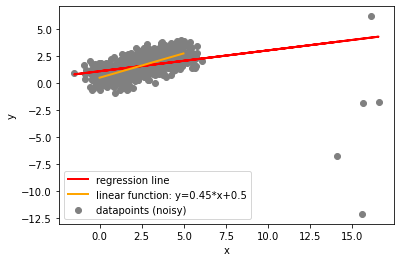

In [11]:
#
# generate a simple dataset with some noise and outlier points
#
np.random.seed(0)
#
xMin = 0
xMax = 5
#
nPoints = 1000  
#
slope = 0.45
#
intercept = 0.5
#
nOutliers = 5
#
distortion = 0.6
#
# --------------------------------------------------------------------------------
# define clear dataset
clearLinData = get_DataPoints((nPoints + nOutliers), slope, intercept, xMax, xMin)
#
# add Outliers
clearLinData[nPoints:,0] = 15 + 0.5 * np.random.normal(size=(nOutliers))
clearLinData[nPoints:,1] = -3 - 10 * np.random.normal(size=nOutliers)
#
# create some noise
noiseData = create_noiseVec(distortion, (nPoints + nOutliers))
# add noise to the linear points
noisyPoints = clearLinData + noiseData
#
# calc linear regression
#
dictReg = calc_regression(noisyPoints)
#
######################################
# plot data
#
# 
xPoints = dictReg["X"]
yPoints = dictReg["Y"]
#
yPredict = dictReg["yPredict"]
#
# all points (with little noise)
plt.scatter(xPoints, yPoints, color='gray', label="datapoints (noisy)")
# regression line from regression model
plt.plot(xPoints, yPredict, color='red', linewidth=2, label="regression line")
# linear function of clean data (y = m*x + b)
plt.plot(clearLinData[0:nPoints,0], clearLinData[0:nPoints,1], color='orange', lw=2, label="linear function: y={}*x+{}".format(slope, intercept))
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

<a id='regularized_regression'>**Regularized Regression**</a>

In the following examples 2 methods are shown:
- ridge regression
- Lasso

###### Ridge regression
Ridge regression addresses some of the problems of Ordinary Least Squares by imposing a penalty on the size of the coefficients. The ridge coefficients minimize a penalized residual sum of squares:
$$ \min\limits_{\omega} || X\omega-y||_2^2 + \alpha ||\omega||_2^2$$
The complexity parameter $\alpha \geq 0$ controls the amount of shrinkage: the larger the value of $\alpha$, the greater the amount of shrinkage and thus the coefficients become more robust to collinearity.
As with other linear models, Ridge will take in its ${fit}$ method arrays $X, y$ and will store the coefficients  of the linear model in its $\text{coef_}$ member.<br>
more info about ridge regression: [scikit-learn.ridge-regession:](https://scikit-learn.org/stable/modules/linear_model.html#ridge-regression-and-classification)<br>

###### Lasso
The Lasso is a linear model that estimates sparse coefficients. It is useful in some contexts due to its tendency to prefer solutions with fewer non-zero coefficients, effectively reducing the number of features upon which the given solution is dependent. For this reason Lasso and its variants are fundamental to the field of compressed sensing. Under certain conditions, it can recover the exact set of non-zero coefficients (see [Compressive sensing: tomography reconstruction with L1 prior (Lasso)](https://scikit-learn.org/stable/auto_examples/applications/plot_tomography_l1_reconstruction.html#sphx-glr-auto-examples-applications-plot-tomography-l1-reconstruction-py)).
Mathematically, it consists of a linear model with an added regularization term. The objective function to minimize is:
$$ \min\limits_{\omega} \frac{1}{2n_{samples}} || X\omega-y||_2^2 + \alpha ||\omega||_1$$
 
The lasso estimate thus solves the minimization of the least-squares penalty with $\alpha||\omega||_1$ added, where $\alpha$ is a constant and $||\omega||_1$ is the $\ell_1$-norm of the coefficient vector.
The implementation in the class Lasso uses coordinate descent as the algorithm to fit the coefficients. See [Least Angle Regression](https://scikit-learn.org/stable/modules/linear_model.html#least-angle-regression) for another implementation

more info about Lasso: [scikit-learn.ridge-regession:](https://scikit-learn.org/stable/modules/linear_model.html#lasso)<br>

<a id="example_4"></a><br>
**example 4**
regularized regression with ridge regression and lasso

In this example the slope and intercept value from the ridge and lasso regression will be displayd in a histogram plot. To demonstrate the 2 methods, 3 datasets with different slopes will be created and fitted to the both models. This process will be repeated for 1000 times.

functions:
- f1: $y=0.0\cdot x+ 1.0$
- f2: $y=0.2\cdot x+ 1.0$
- f3: $y=2.0\cdot x+ 1.0$

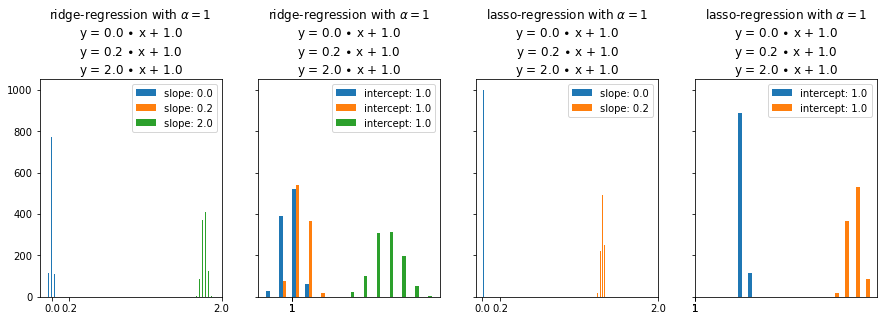

In [12]:
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt
#
alpha = 1
#
xMin = 0
#
xMax = 5
#
nPoints = 500
#
distortion= 0.5
#
nRepeats = 1000
#
slopes=[0.0, 0.2, 2.0]
#
intercept = [1.0, 1.0, 1.0]
#
coef_result = np.empty([nRepeats,6])
intercpt_result = np.empty([nRepeats,6])
#
ridgeModel = Ridge(alpha=alpha)
lassoModel = Lasso(alpha=alpha, max_iter=1e5)
#
for i in range(nRepeats):
    #
    noise = create_noiseVec(distortion, nPoints)
    #
    set1 = get_DataPoints(nPoints, slopes[0], intercept[0], xMax, xMin) + noise
    set2 = get_DataPoints(nPoints, slopes[1], intercept[1], xMax, xMin) + noise
    set3 = get_DataPoints(nPoints, slopes[2], intercept[2], xMax, xMin) + noise
    #
    # fit and analyse set1
    ridgeModel.fit(set1[:,0].reshape(-1,1), set1[:,1].reshape(-1,1))
    coef_result[i,0] = ridgeModel.coef_
    intercpt_result[i,0] = ridgeModel.intercept_
    #
    lassoModel.fit(set1[:,0].reshape(-1,1), set1[:,1].reshape(-1,1))
    coef_result[i,3] = lassoModel.coef_
    intercpt_result[i,3] = lassoModel.intercept_
    #
    # fit and analyse set2
    ridgeModel.fit(set2[:,0].reshape(-1,1), set2[:,1].reshape(-1,1))
    coef_result[i,1] = ridgeModel.coef_
    intercpt_result[i,1] = ridgeModel.intercept_
    #
    lassoModel.fit(set2[:,0].reshape(-1,1), set2[:,1].reshape(-1,1))
    coef_result[i,4] = lassoModel.coef_
    intercpt_result[i,4] = lassoModel.intercept_
    #
    # fit and analyse set3
    ridgeModel.fit(set3[:,0].reshape(-1,1), set3[:,1].reshape(-1,1))
    coef_result[i,2] = ridgeModel.coef_
    intercpt_result[i,2] = ridgeModel.intercept_
    #
    lassoModel.fit(set3[:,0].reshape(-1,1), set3[:,1].reshape(-1,1))
    coef_result[i,5] = lassoModel.coef_
    intercpt_result[i,5] = lassoModel.intercept_
    #
#----------------------------------------------------------------
#
# plot results
#
# slopes:                        interceptions:
# |--0..2--| ... |--3...5--|     |--0..2--| ... |--3...5--|
# |ridge() | ... | lasso()|      |ridge() | ... | lasso()|
# | set1-3 | ... | set1-3 |      | set1-3 | ... | set1-3 |
#
#
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(15,4), sharey=True)
axes[0].hist(coef_result[:,0:3], 55)
axes[1].hist(intercpt_result[:,0:3], 13)
axes[2].hist(coef_result[:,4:6], 55)
axes[3].hist(intercpt_result[:,4:6], 13)
#
axes[0].set_xticks(slopes)
# axes[0].set_ylim([0,1000])
axes[1].set_xticks(intercept)
axes[2].set_xticks(slopes)
axes[3].set_xticks(intercept)

#
str0 = r"ridge-regression with $\alpha = {{{}}}$".format(alpha)
str0 += "\n"
str0 += r"y = {} $\bullet$ x + {}".format(slopes[0], intercept[0])
str0 += "\n"
str0 += r"y = {} $\bullet$ x + {}".format(slopes[1], intercept[1])
str0 += "\n"
str0 += r"y = {} $\bullet$ x + {}".format(slopes[2], intercept[2])
axes[0].set_title(str0)
axes[0].legend(['slope: %.1f'%slopes[0], 'slope: %.1f'%slopes[1], 'slope: %.1f'%slopes[2]])
axes[1].set_title(str0)
axes[1].legend(['intercept: %.1f' %intercept[0], 'intercept: %.1f' %intercept[1], 'intercept: %.1f' %intercept[2]])
#
str1 = str0.replace('ridge', 'lasso')
axes[2].set_title(str1)
axes[2].legend(['slope: %.1f'%slopes[0], 'slope: %.1f'%slopes[1], 'slope: %.1f'%slopes[2]])
axes[3].set_title(str1)
axes[3].legend(['intercept: %.1f' %intercept[0], 'intercept: %.1f' %intercept[1], 'intercept: %.1f' %intercept[2]])
#
plt.show()

<a id="example_5"></a>**Example 5**

Regularized Regression with polynomial dataset

A polynomial function will be represented with just a litte amount of data points. This training data will be used for different regression models. The result can be seen in the following diagrams:

polynomial function:
$y= -10 \cdot x^3 - 2.3 \cdot x^2 + 0.1\cdot x -2$

number of training points (nPoints): 40
xMin: -2
xMax: 2
distortion: 0.5
alpha ridge: 0.5
alpha lasso: 0.5
degree polyfit: 3


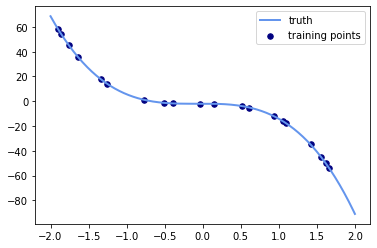

In [13]:
#
import matplotlib.pyplot as plt
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso 
#
# sample function: y = -10x³ - 2.3x² + 0.1x -2
#
def f(x):
    return(-10*x**3 - 2.3*x**2 +0.1*x -2)

#
# create dataset
# generate points and keep a subset of them
xMin=-2
xMax=2
#
nPoints = 20
#
alpha_ridge = 2.0
alpha_lasso = 3.0
#
#
x_0 = np.linspace(xMin,xMax,200)
x_plot = np.linspace(xMin,xMax,200)
#
#
rng = np.random.RandomState(0)
rng.shuffle(x_0)
x = np.sort(x_0[:nPoints])
y = f(x)
#
X = x[:, np.newaxis]
X_plot = x_plot[:, np.newaxis]
#--------------------------------------------------
#
# plot data
#
colors = ['teal', 'yellowgreen', 'gold', 'gray']
lw = 2
plt.plot(x_plot, f(x_plot), color='cornflowerblue', linewidth=lw,
         label="truth")
#
plt.scatter(X, y, color='navy', s=30, marker='o', label="training points")
#
plt.legend()
plt.show()

show training data with linear Regression:

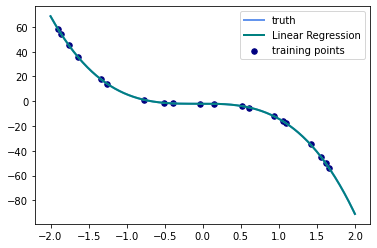

In [14]:
# plot data
#
colors = ['teal', 'yellowgreen', 'gold', 'gray']
lw = 2
plt.plot(x_plot, f(x_plot), color='cornflowerblue', linewidth=lw,
         label="truth")
#
plt.scatter(X, y, color='navy', s=30, marker='o', label="training points")
#
# linear regression
#
polynomial_features = PolynomialFeatures(degree=5)
pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", LinearRegression())])
# linModel = make_pipeline(PolynomialFeatures(1), LinearRegression())
pipeline.fit(X,y)
LinPlot = pipeline.predict(X_plot)
plt.plot(x_plot, LinPlot, color=colors[0], linewidth=lw, label="Linear Regression")
plt.legend()
plt.show()

show training data with polyfit

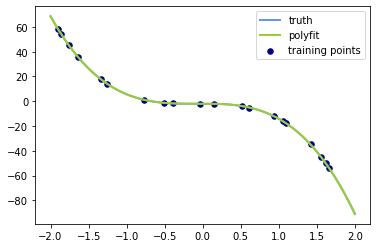

In [15]:
# plot data
#
colors = ['teal', 'yellowgreen', 'gold', 'gray']
lw = 2
plt.plot(x_plot, f(x_plot), color='cornflowerblue', linewidth=lw,
         label="truth")
#
plt.scatter(X, y, color='navy', s=30, marker='o', label="training points")
#
# poly fitting
polyFit = np.poly1d(np.polyfit(x,y,3))
plt.plot(x_plot, polyFit(x_plot), color=colors[1], lw=lw, label="polyfit")
#
plt.legend()
plt.show()

show training data with Ridge

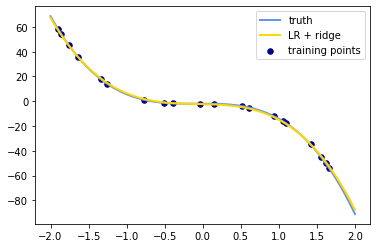

In [16]:
# plot data
#
colors = ['teal', 'yellowgreen', 'gold', 'gray']
lw = 2
plt.plot(x_plot, f(x_plot), color='cornflowerblue', linewidth=lw,
         label="truth")
#
plt.scatter(X, y, color='navy', s=30, marker='o', label="training points")
#
#LR + ridge
LR_ridge = Pipeline([("polynomial_features", PolynomialFeatures(degree=3)),
                         ("linear_regression", Ridge(alpha=2))
                    ])
LR_ridge.fit(X,y)
yLR_ridge = LR_ridge.predict(X_plot)
#
plt.plot(X_plot, yLR_ridge, color=colors[2],lw=lw,label="LR + ridge")
plt.legend()
plt.show()

show training data with Lasso

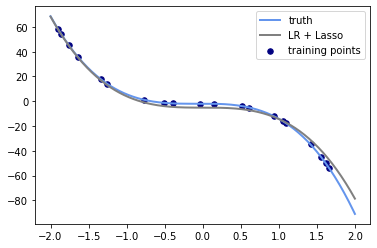

In [17]:
# plot data
#
colors = ['teal', 'yellowgreen', 'gold', 'gray']
lw = 2
plt.plot(x_plot, f(x_plot), color='cornflowerblue', linewidth=lw,
         label="truth")
#
plt.scatter(X, y, color='navy', s=30, marker='o', label="training points")
#

#LR + lasso
LR_lasso = Pipeline([("polynomial_features", PolynomialFeatures(degree=3)),
                         ("linear_regression", Lasso(alpha = 5))
                    ])
LR_lasso.fit(X,y)
yLR_lasso = LR_lasso.predict(X_plot)
#
plt.plot(X_plot, yLR_lasso, color=colors[3],lw=lw,label="LR + Lasso")
plt.legend()
plt.show()

plot all regression results 

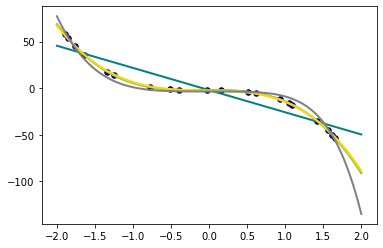

In [18]:
# plot data
#
colors = ['teal', 'yellowgreen', 'gold', 'gray']
lw = 2
plt.plot(x_plot, f(x_plot), color='cornflowerblue', linewidth=lw,
         label="truth")
#
plt.scatter(X, y, color='navy', s=30, marker='o', label="training points")
#
# linear regression
#
polynomial_features = PolynomialFeatures(degree=1)
pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", LinearRegression())])
# linModel = make_pipeline(PolynomialFeatures(1), LinearRegression())
pipeline.fit(X,y)
LinPlot = pipeline.predict(X_plot)
plt.plot(x_plot, LinPlot, color=colors[0], linewidth=lw, label="Linear Regression")
#
# poly fitting
polyFit = np.poly1d(np.polyfit(x,y,3))
plt.plot(x_plot, polyFit(x_plot), color=colors[1], lw=lw, label="polyfit")
#
#LR + ridge
LR_ridge = Pipeline([("polynomial_features", PolynomialFeatures(degree=4)),
                         ("linear_regression", Ridge(alpha=alpha_ridge))
                    ])
LR_ridge.fit(X,y)
yLR_ridge = LR_ridge.predict(X_plot)
#
plt.plot(X_plot, yLR_ridge, color=colors[2],lw=lw,label="LR + ridge")
#
#LR + lasso
LR_lasso = Pipeline([("polynomial_features", PolynomialFeatures(degree=6)),
                         ("linear_regression", Lasso(alpha=alpha_lasso))])
LR_lasso.fit(X,y)
yLR_lasso = LR_lasso.predict(X_plot)
#
plt.plot(X_plot, yLR_lasso, color=colors[3],lw=lw,label="LR + Lasso")


Copyright © 2020 IUBH Internationale Hochschule